# 대학 전공 데이터 분석
* 전공별 소득을 비교해서 어떤 전공이 가장 좋은지 알아보려 한다.


## 데이터 불러오기 및 데이터 기본 확인

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization
sns.set_style("white")

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jinhyukbae/data_test/main/college/college_majors.csv')
df

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.1206,36,1976,...,270,1207,37,0.0184,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.1019,7,640,...,170,388,85,0.1172,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.1530,3,648,...,133,340,16,0.0241,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.1073,16,758,...,150,692,40,0.0501,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.3416,289,25694,...,5180,16697,1672,0.0611,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.6373,47,6259,...,2190,3602,304,0.0463,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.8171,7,2125,...,572,1211,148,0.0651,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.7999,13,2101,...,648,1293,368,0.1490,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.7987,21,3777,...,965,2738,214,0.0536,23400,19200,26000,2403,1245,308


In [3]:
df.shape # 173행 21속성 

(173, 21)

In [4]:
df.info()

#Major Major_category 범주형 변수
#결측치 확인  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

In [5]:
df.isna().sum()

Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

In [6]:
df.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068190,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231203,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030329,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336050,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050300,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534000,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.068000,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703275,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087600,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.969000,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177200,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [7]:
df.corr()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
Rank,1.000000,0.108429,0.071137,-0.094780,0.174913,0.643783,0.008492,0.070751,0.034725,0.193174,0.020418,0.090078,0.068924,-0.873308,-0.735688,-0.802686,0.052639,0.144689,0.202920
Major_code,0.108429,1.000000,0.196784,0.179299,0.181459,0.259200,0.206580,0.200925,0.199397,0.195184,0.205634,0.223418,0.126712,-0.176072,-0.166864,-0.094556,0.041198,0.232425,0.225294
Total,0.071137,0.196784,1.000000,0.878088,0.944764,0.142997,0.945575,0.996214,0.989339,0.950268,0.981112,0.974768,0.083301,-0.106738,-0.071926,-0.083198,0.800465,0.941247,0.935510
Men,-0.094780,0.179299,0.878088,1.000000,0.672759,-0.112012,0.875176,0.870605,0.893563,0.751592,0.892454,0.869411,0.101602,0.025991,0.038725,0.052393,0.563168,0.851500,0.791336
Women,0.174913,0.181459,0.944764,0.672759,1.000000,0.297828,0.862606,0.944037,0.917681,0.954513,0.905720,0.911694,0.059209,-0.182842,-0.137738,-0.164528,0.851946,0.872132,0.904470
ShareWomen,0.643783,0.259200,0.142997,-0.112012,0.297828,1.000000,0.097493,0.147544,0.120199,0.212283,0.112522,0.121242,0.073260,-0.618686,-0.500196,-0.586929,0.195547,0.137001,0.187845
Sample_size,0.008492,0.206580,0.945575,0.875176,0.862606,0.097493,1.000000,0.964462,0.978396,0.824824,0.985235,0.918059,0.059983,-0.067578,-0.025229,-0.055737,0.701704,0.915464,0.860319
Employed,0.070751,0.200925,0.996214,0.870605,0.944037,0.147544,0.964462,1.000000,0.995838,0.934528,0.991047,0.968900,0.068170,-0.107547,-0.067514,-0.087560,0.797534,0.941326,0.927224
Full_time,0.034725,0.199397,0.989339,0.893563,0.917681,0.120199,0.978396,0.995838,1.000000,0.900877,0.998203,0.960102,0.063459,-0.082258,-0.042957,-0.065073,0.772515,0.933124,0.904852
Part_time,0.193174,0.195184,0.950268,0.751592,0.954513,0.212283,0.824824,0.934528,0.900877,1.000000,0.880855,0.945094,0.109064,-0.190124,-0.153509,-0.158220,0.804987,0.909634,0.951593


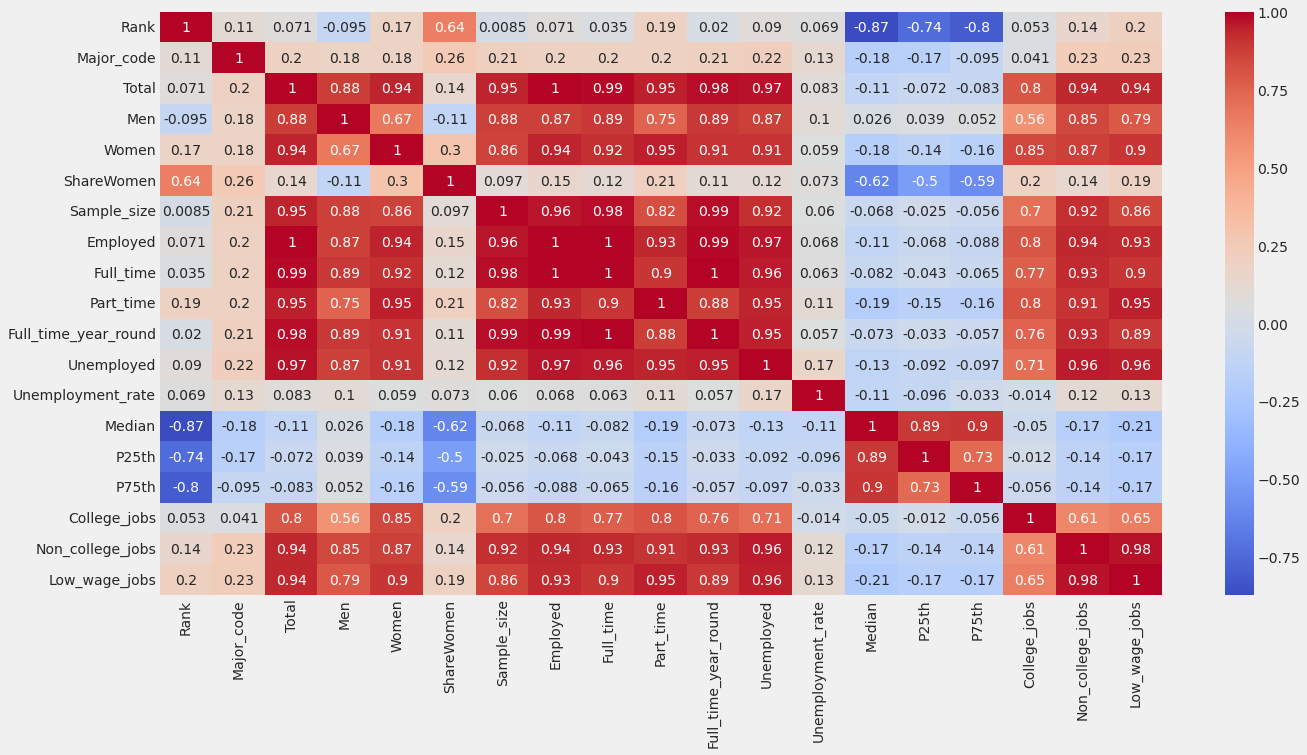

In [8]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))

dataplot = sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

plt.show()

# 연봉 TOP 10 학과는??

In [9]:
top10 = df.head(10)
top10

# 석유공학이 1등이고 엔지니어 계열 공학이 TOP10에 포진 되어 있다. 

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.1206,36,1976,...,270,1207,37,0.0184,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.1019,7,640,...,170,388,85,0.1172,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.1530,3,648,...,133,340,16,0.0241,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.1073,16,758,...,150,692,40,0.0501,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.3416,289,25694,...,5180,16697,1672,0.0611,65000,50000,75000,18314,4440,972
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.1450,17,1857,...,264,1449,400,0.1772,65000,50000,102000,1142,657,244
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.4414,51,2912,...,296,2482,308,0.0957,62000,53000,72000,1768,314,259
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.5357,10,1526,...,553,827,33,0.0212,62000,31500,109000,972,500,220
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,0.1196,1029,76442,...,13101,54639,4650,0.0573,60000,48000,70000,52844,16384,3253
9,10,2408,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0,Engineering,0.1965,631,61928,...,12695,41413,3895,0.0592,60000,45000,72000,45829,10874,3170


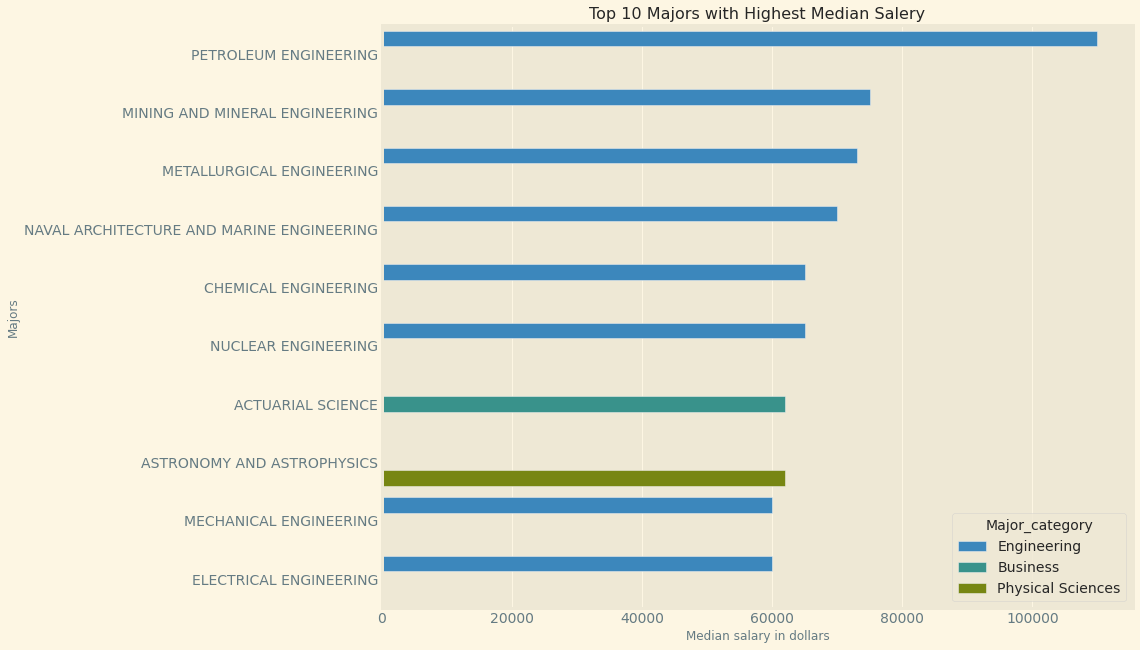

In [10]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(12,10))
plt.title('Top 10 Majors with Highest Median Salery')
median_plot = sns.barplot(data=top10, y="Major", x = 'Median', hue='Major_category')
median_plot.set_xlabel('Median salary in dollars')
median_plot.set_ylabel('Majors')
plt.show()


# 연봉 하위 TOP 10 ???

In [11]:
bot10 = df.tail(10)
bot10

# 이공계인 동물학이나 심리학이 연봉 하위에 있는 게 의아하다  

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
163,164,6102,COMMUNICATION DISORDERS SCIENCES AND SERVICES,38279.0,1225.0,37054.0,Health,0.9680,95,29763,...,13862,14460,1487,0.0476,28000,20000,40000,19957,9404,5125
164,165,2307,EARLY CHILDHOOD EDUCATION,37589.0,1167.0,36422.0,Education,0.9690,342,32551,...,7001,20748,1360,0.0401,28000,21000,35000,23515,7705,2868
165,166,2603,OTHER FOREIGN LANGUAGES,11204.0,3472.0,7732.0,Humanities & Liberal Arts,0.6901,56,7052,...,3685,3214,846,0.1071,27500,22900,38000,2326,3703,1115
166,167,6001,DRAMA AND THEATER ARTS,43249.0,14440.0,28809.0,Arts,0.6661,357,36165,...,15994,16891,3040,0.0775,27000,19200,35000,6994,25313,11068
167,168,3302,COMPOSITION AND RHETORIC,18953.0,7022.0,11931.0,Humanities & Liberal Arts,0.6295,151,15053,...,6612,7832,1340,0.0817,27000,20000,35000,4855,8100,3466
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.6373,47,6259,...,2190,3602,304,0.0463,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.8171,7,2125,...,572,1211,148,0.0651,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.7999,13,2101,...,648,1293,368,0.1490,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.7987,21,3777,...,965,2738,214,0.0536,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.8780,2,742,...,237,410,87,0.1049,22000,20000,22000,288,338,192


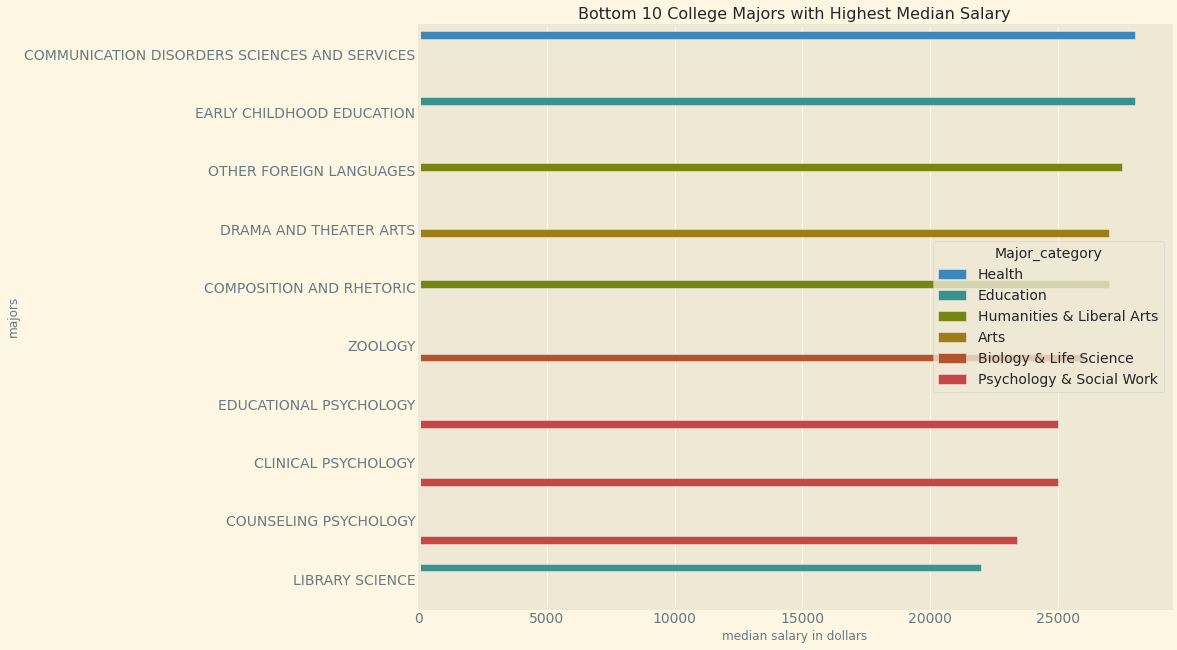

In [12]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(12,10))
plt.title("Bottom 10 College Majors with Highest Median Salary")
median_plot = sns.barplot(data=bot10, y='Major',x='Median',hue='Major_category')
median_plot.set_xlabel('median salary in dollars')
median_plot.set_ylabel('majors')
plt.show()

# 전공 카테고리 Major_category

In [13]:
df['Major_category'].value_counts()

Engineering                            29
Education                              16
Humanities & Liberal Arts              15
Biology & Life Science                 14
Business                               13
Health                                 12
Computers & Mathematics                11
Physical Sciences                      10
Agriculture & Natural Resources        10
Social Science                          9
Psychology & Social Work                9
Arts                                    8
Industrial Arts & Consumer Services     7
Law & Public Policy                     5
Communications & Journalism             4
Interdisciplinary                       1
Name: Major_category, dtype: int64

In [14]:
Major_counts = df['Major_category'].value_counts()
Major_counts
Major_counts.index

Index(['Engineering', 'Education', 'Humanities & Liberal Arts',
       'Biology & Life Science', 'Business', 'Health',
       'Computers & Mathematics', 'Physical Sciences',
       'Agriculture & Natural Resources', 'Social Science',
       'Psychology & Social Work', 'Arts',
       'Industrial Arts & Consumer Services', 'Law & Public Policy',
       'Communications & Journalism', 'Interdisciplinary'],
      dtype='object')

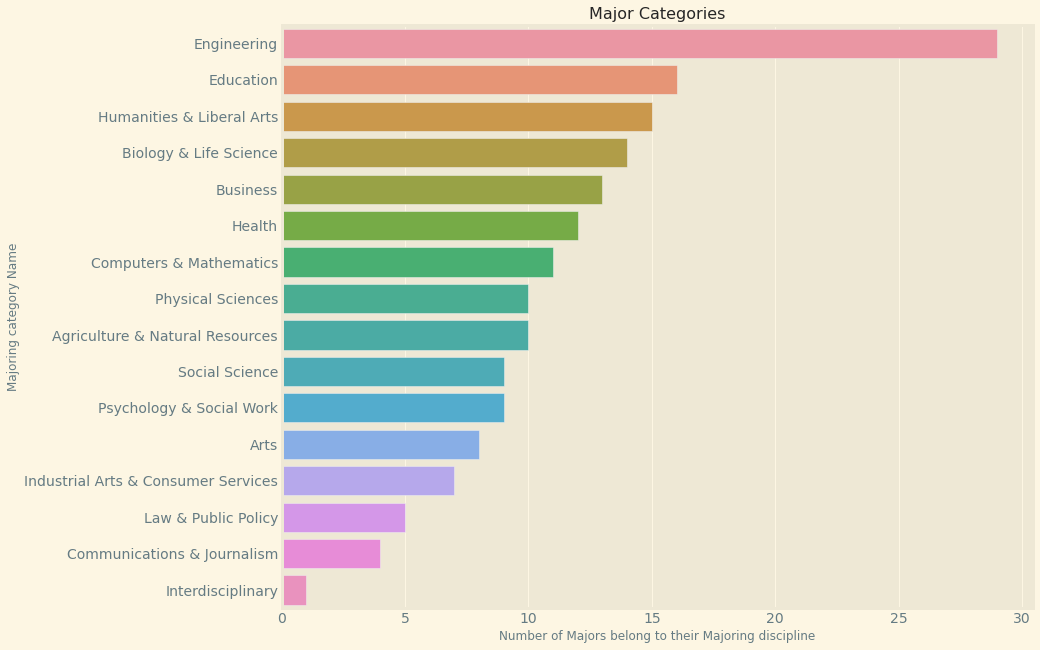

In [15]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(12,10))
plt.title("Major Categories")

Major_category_plot = sns.countplot(y ='Major_category',
                                    data = df,
                                    order = df['Major_category'].value_counts().index
                                    )
Major_category_plot.set_xlabel("Number of Majors belong to their Majoring discipline")
Major_category_plot.set_ylabel("Majoring category Name")
plt.show()

# 중위소득 Median

In [16]:
df['Median'].value_counts()

35000     20
40000     17
50000      9
33000      9
45000      9
34000      8
32000      8
30000      8
36000      6
60000      6
38000      5
29000      4
46000      3
28000      3
31000      3
42000      2
33500      2
25000      2
65000      2
62000      2
41000      2
53000      2
54000      2
27000      2
47000      2
52000      2
30500      1
26000      1
32100      1
32200      1
32400      1
32500      1
27500      1
33400      1
23400      1
31500      1
110000     1
35600      1
36200      1
73000      1
70000      1
58000      1
57100      1
57000      1
56000      1
51000      1
48000      1
44700      1
44000      1
41300      1
40100      1
39000      1
38400      1
75000      1
37500      1
37400      1
37000      1
36400      1
22000      1
Name: Median, dtype: int64

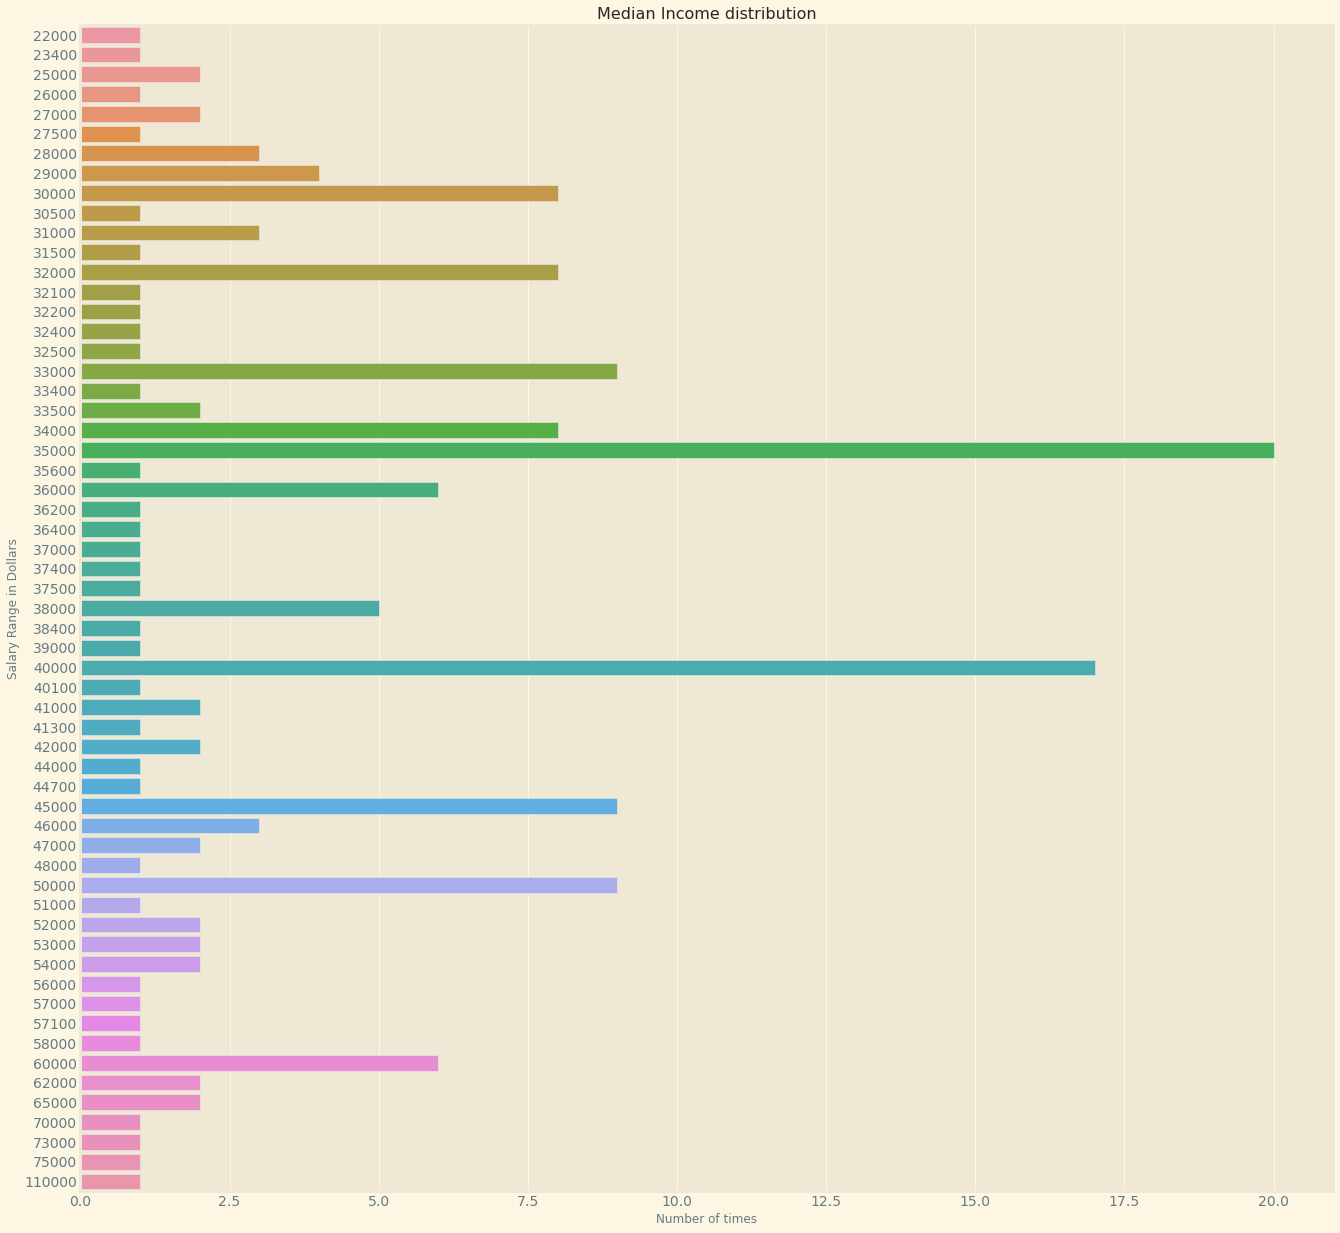

In [17]:
plt.style.use("Solarize_Light2")
plt.figure(figsize=(20,20))
plt.title("Median Income distribution")
median_income_dist_plot = sns.countplot(data=df,y="Median")
median_income_dist_plot.set_xlabel("Number of times")
median_income_dist_plot.set_ylabel("Salary Range in Dollars")
plt.show()


# 30000~50000까지 가장 많이 발생한다 

# 전공별 실업률 Unemployment

In [18]:
df['Unemployment_rate'] = df['Unemployment_rate'] * 100
df.head(2)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.1206,36,1976,...,270,1207,37,1.84,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.1019,7,640,...,170,388,85,11.72,75000,55000,90000,350,257,50


[]

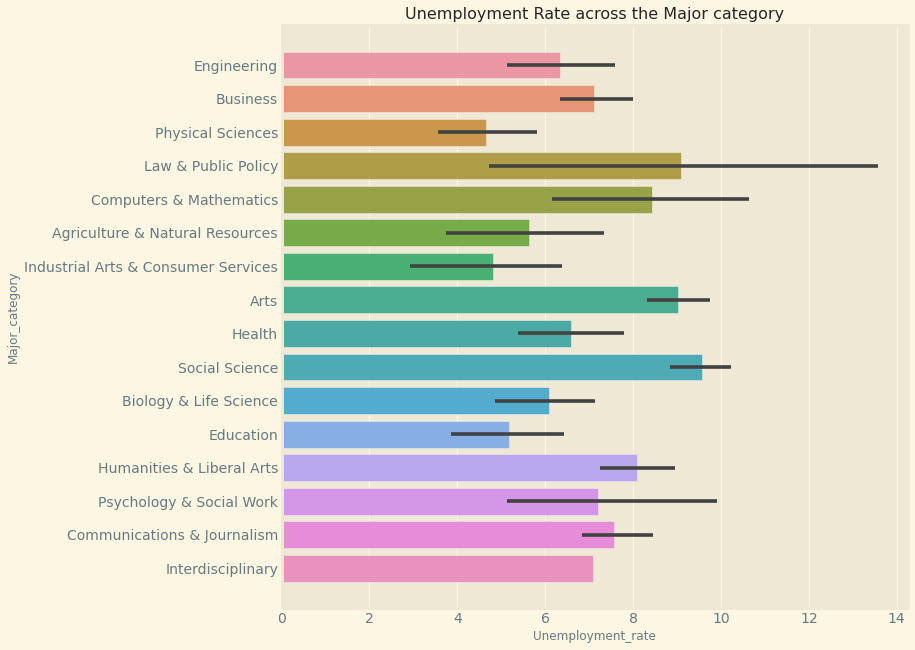

In [19]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(10,10))
plt.title("Unemployment Rate across the Major category")
sns.barplot(data=df,x='Unemployment_rate',y='Major_category')
plt.plot()

# 법학 사회과학 예술 전공이 실업률 top3

[]

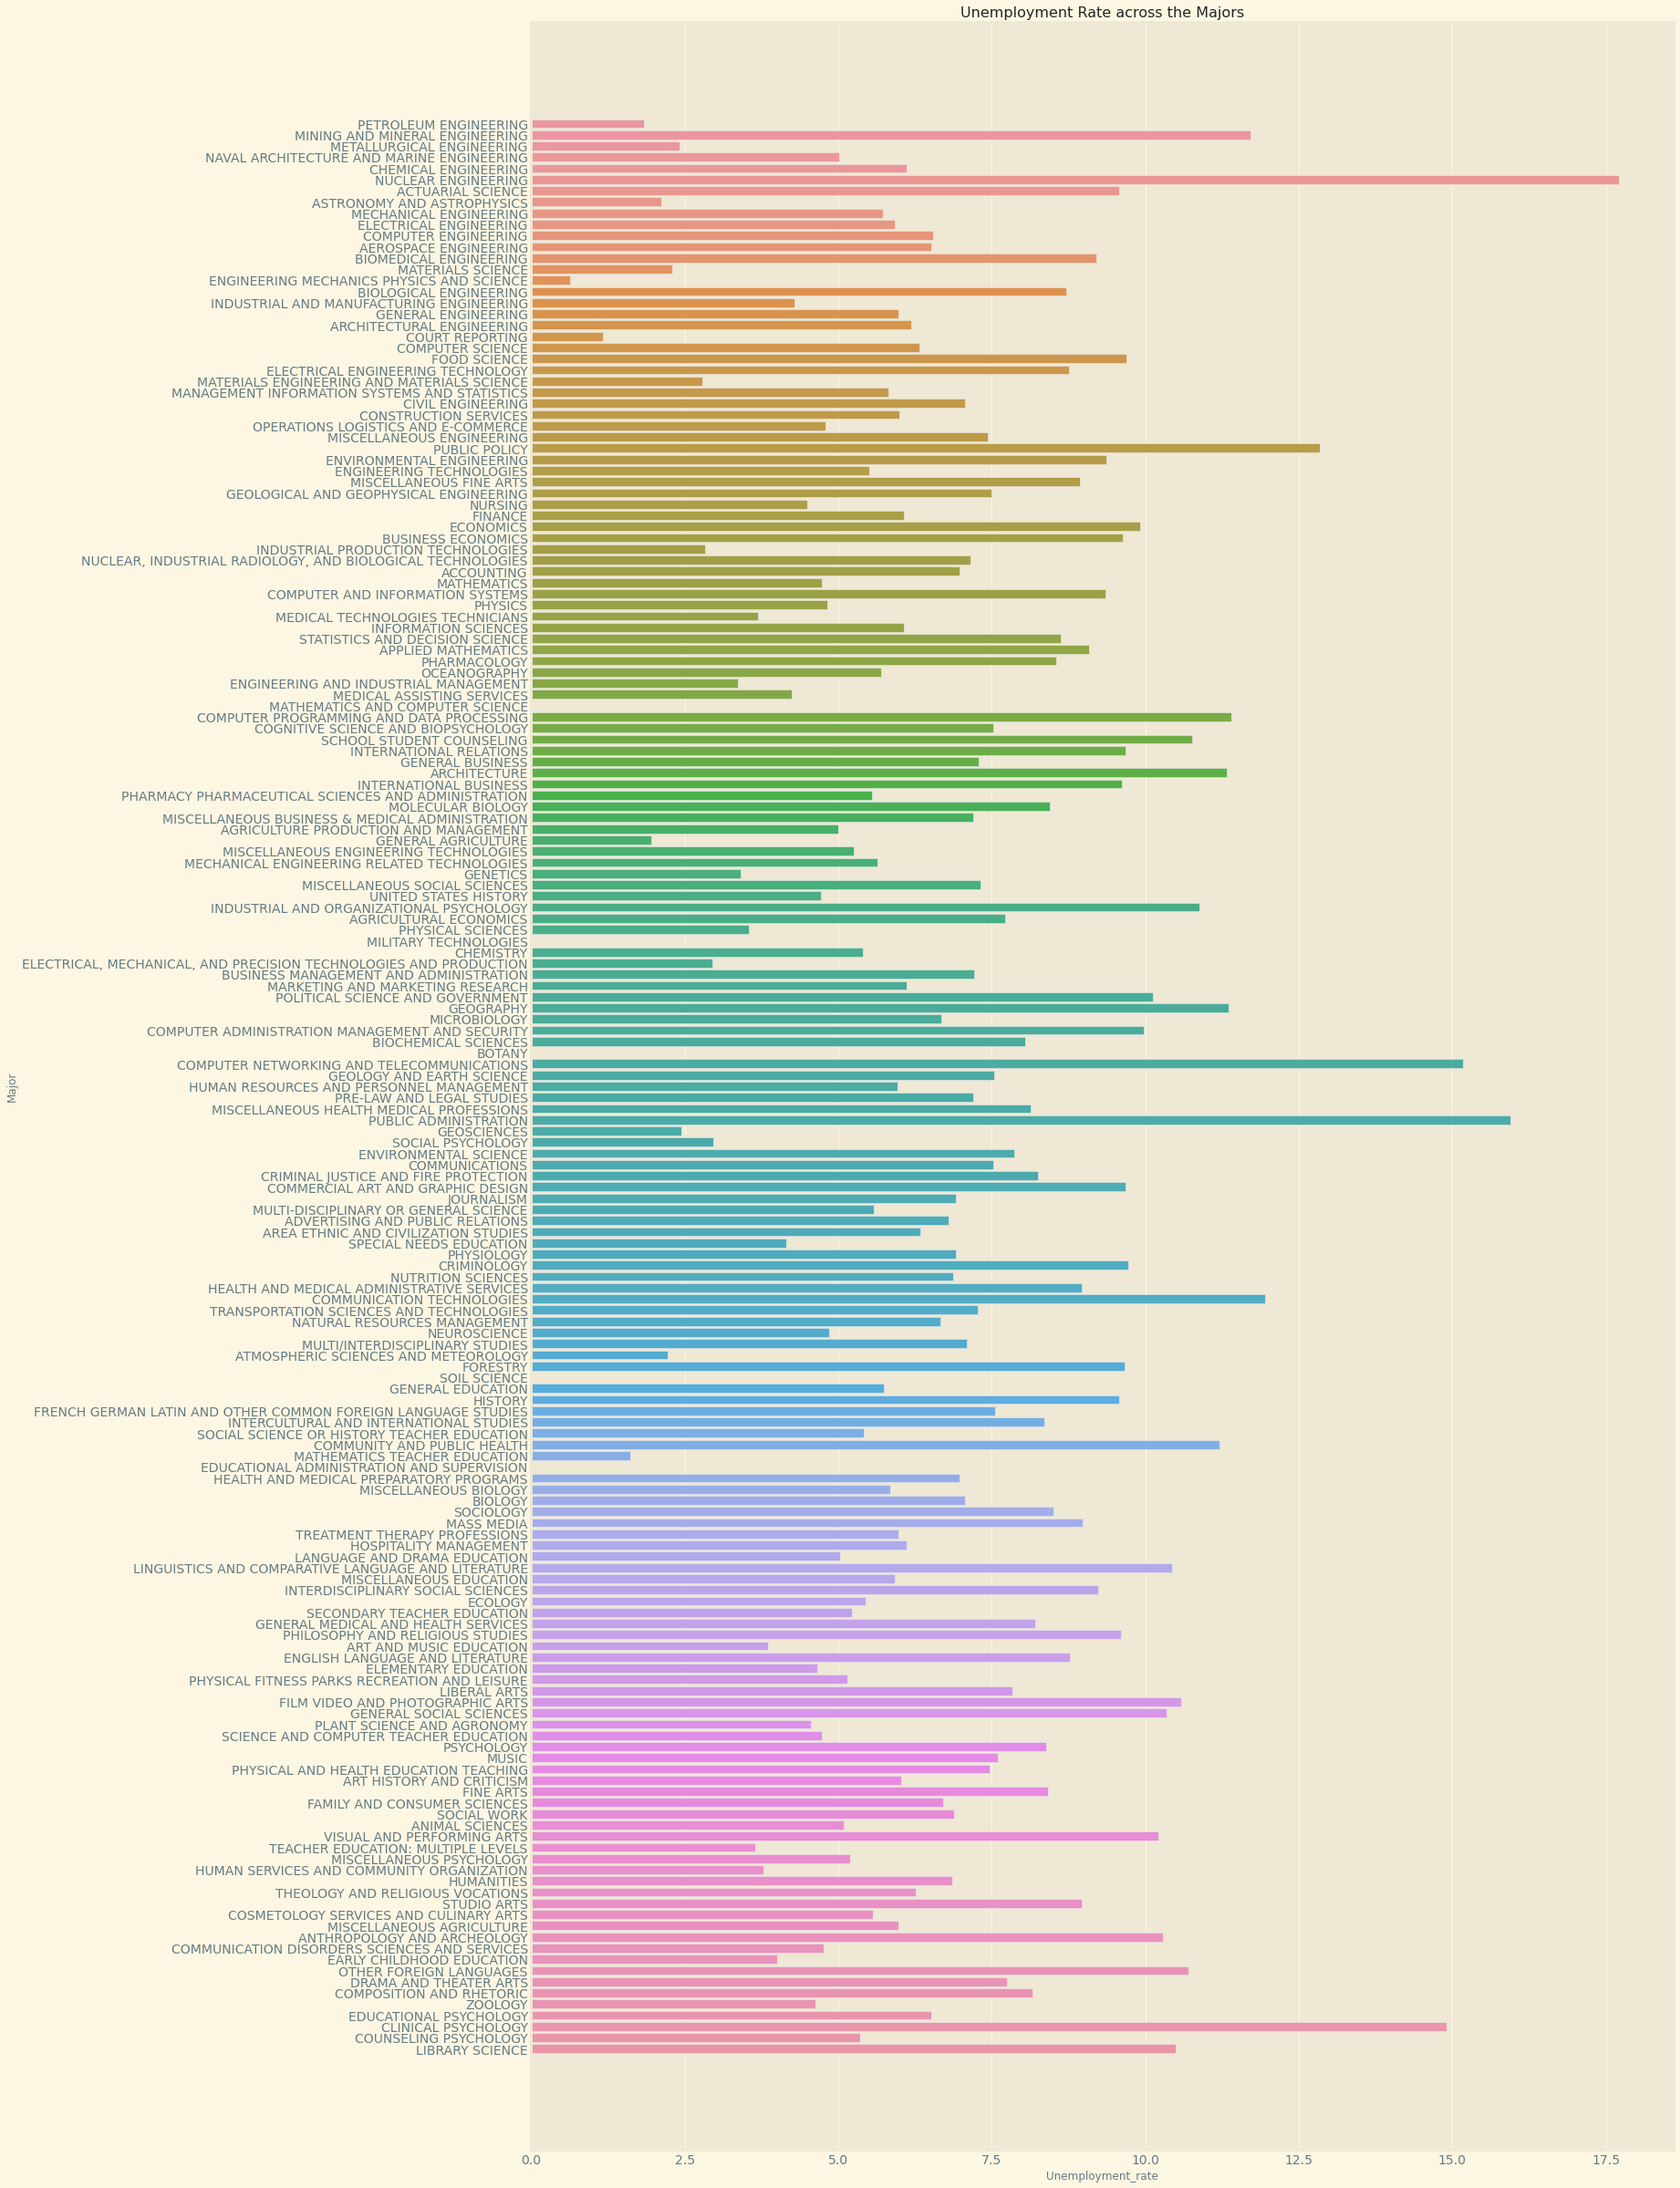

In [20]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(20,40))
plt.title("Unemployment Rate across the Majors")
sns.barplot(data=df, x='Unemployment_rate',y='Major')
plt.plot()

# STEM(과학기술공학수학) 전공들이 취업률이 높은 만큼 실업률도 높은 걸로 확인 

# 전공별 여성 비율

In [21]:
df['ShareWomen'] = df['ShareWomen']*100
df.head(2)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,12.06,36,1976,...,270,1207,37,1.84,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,10.19,7,640,...,170,388,85,11.72,75000,55000,90000,350,257,50


[]

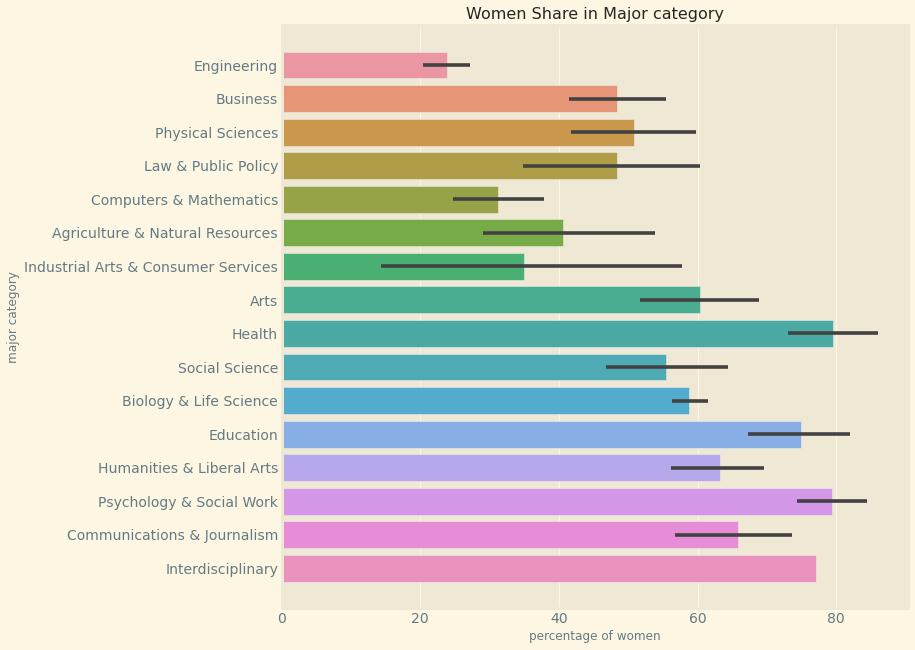

In [23]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(10,10))
plt.title("Women Share in Major category")
plt.xlabel('Percentage of Women')
women_share = sns.barplot(data=df, x='ShareWomen', y='Major_category')
women_share.set_xlabel('percentage of women')
women_share.set_ylabel('major category')
plt.plot()


# 예술 심리학 사회과학 인문학 교육학 전공이 남자보다 많다 

[]

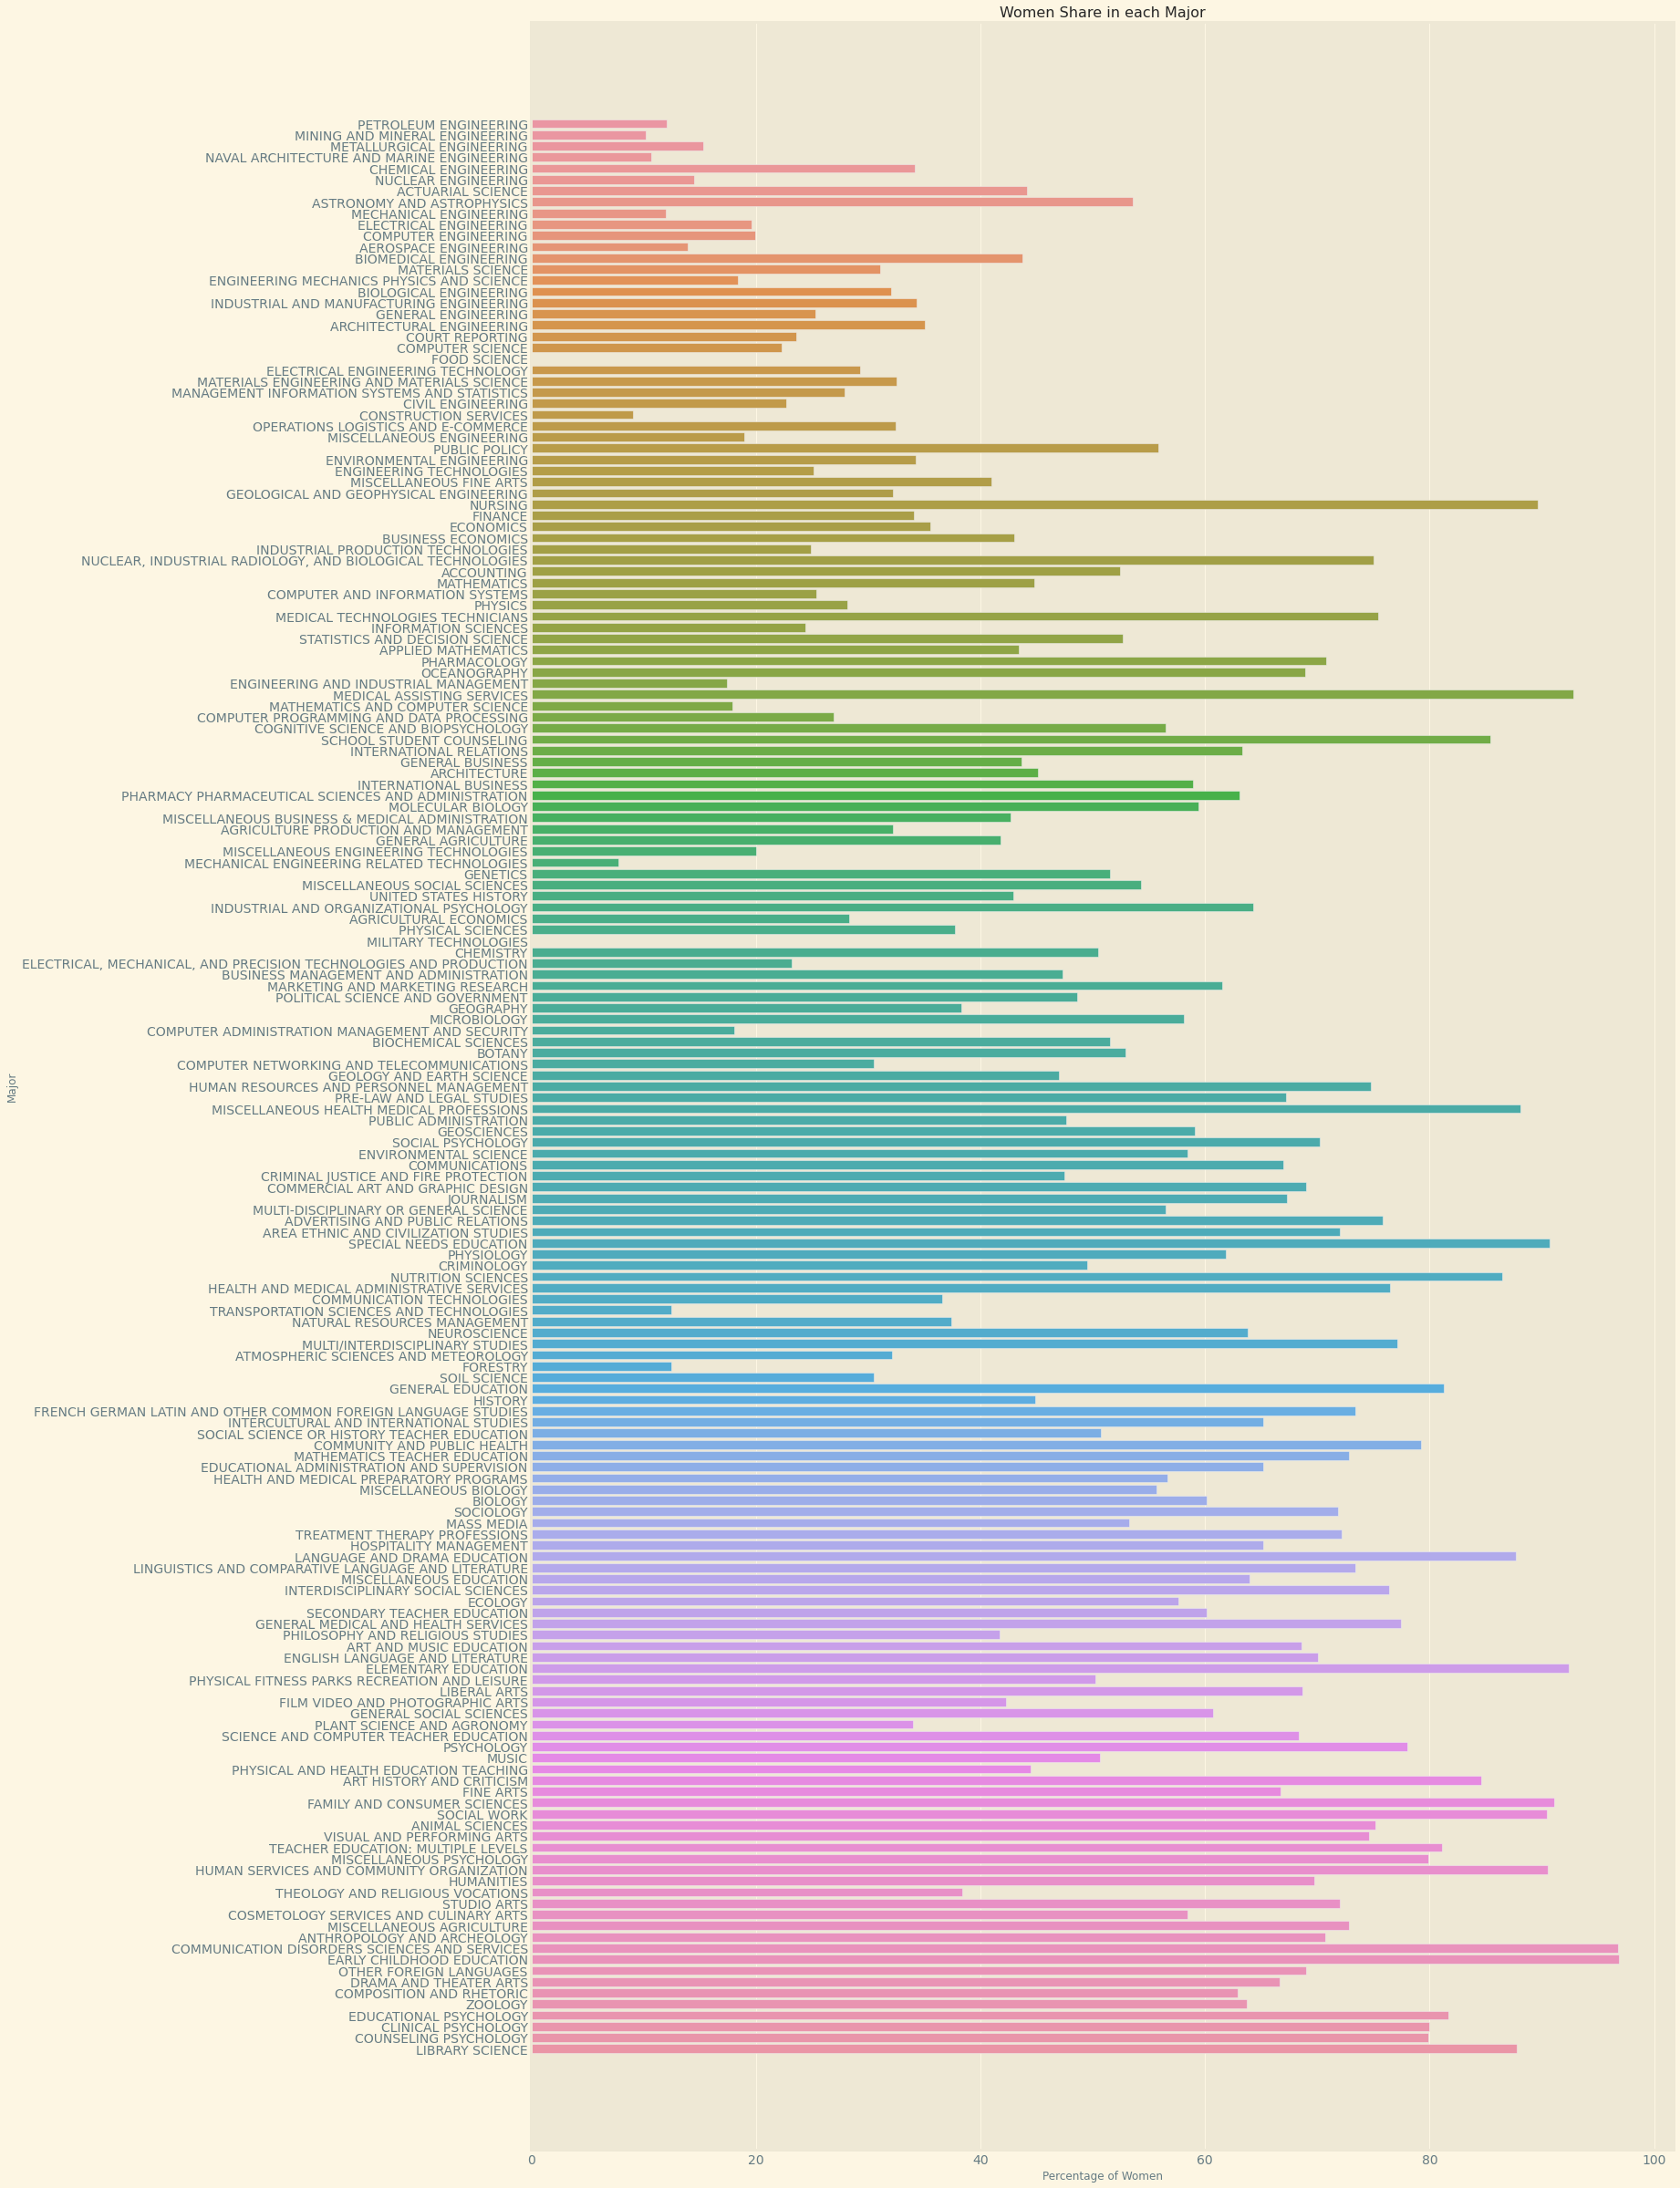

In [42]:
plt.style.use("Solarize_Light2")
plt.figure(figsize=(20,40))
plt.title("Women Share in each Major")
plt.xlabel("Percentage of Women")
women_share_in_each_major_plot = sns.barplot(data=df,x="ShareWomen",y="Major")
women_share_in_each_major_plot .set_xlabel("Percentage of Women")
women_share_in_each_major_plot .set_ylabel("Major")
plt.plot()

# 데이터 분석 결론
1. 석유공학이 연봉이 제일 높다.
2. 동물학과 심리학은 (이 데이터 한정)연봉이 가장 낮은 직업군 이다.
3. 3만달러~5만달러가 가장 많이 발생하는 중위소득이다.
4. 법,사회과학,예술 전공이 실업률이 가장 높다.
5. STEM 전공자 들은 소득이 높은 만큼 실업률도 높다.
6. 예술,심리학,사회과학,인문학,교육 전공에서의 여성 비율은 남성보다 높다.
